## ОПИСАНИЕ КЕЙСА
Вы работаете продуктовым аналитиком в компании-сервисе по доставке продуктов на дом. Сервис доступен как в приложении на iOS, так и на Android. Вы настроили фронтовую аналитику в AppMetrica, и в конце квартала маркетинг-менеджер попросил вас проанализировать поведение пользователей, а также оценить эффективность каналов их привлечения. 

Вы выгрузили данные из AppMetrica за период с 1 января по 31 марта 2020 — только по пользователям, зарегистрированным позднее 1 января 2020.

ОПИСАНИЕ ДАННЫХ 

→ date — дата совершения события

→ event — событие

app_install — установка приложения
app_start —  открыть приложения
registration — зарегистрироваться 
search — перейти на страницу поиска товаров (каталог)
open_item — открыть товар
choose_item — отправить товар в корзину
tap_basket — перейти в корзину
purchase — подтверждение покупки
→ gender — пол пользователя

→ os_name —  платформа пользователя

→ city —  город пользователя

→ device_id — идентификатор устройства пользователя

→ utm_source — канал, с которого пришел пользователь

yandex-direct — Яндекс.Директ
google_ads — реклама в Google
vk_ads — реклама в ВК
instagram_ads — реклама в Инстаграм*
facebook_ads — реклама в Фейсбук*
referral — акция «приведи друга»
Если стоит - (прочерк), то канал не определен или это скачивание приложения напрямую или посещение не с рекламы  
→ purchase_sum —  стоимость покупки (при совершении события ‘purchase’)

Обратите внимание!

* В выгрузке только уникальные действия пользователей за каждый день.
* Можно миновать стадию установки приложения, если оно было установлено ранее.
* Можно миновать стадию регистрации, если пользователь был уже залогинен на момент сессии.    Однако незарегистрированные пользователи не могут оформить покупку.

In [1]:
import pandas as pd

df = pd.read_csv('SF_case_data.csv')
df = pd.DataFrame(df)  #создаем дата фрейм
display(df)  #проверяем данные

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads


####  1. Эффективность каналов привлечения и воронка продаж

Задание 1.1.1
Постройте график с динамикой по всем событиям по дням. В какой день было больше всех событий? Ответ впишите в формате: ДД.ММ.ГГГГ.

          date  event
9   2020-01-10  89831
65  2020-03-06  63264
10  2020-01-11  58169
44  2020-02-14  54233
13  2020-01-14  53783
..         ...    ...
5   2020-01-06  19717
3   2020-01-04  19152
90  2020-03-31  19003
7   2020-01-08  18616
6   2020-01-07  18226

[91 rows x 2 columns]


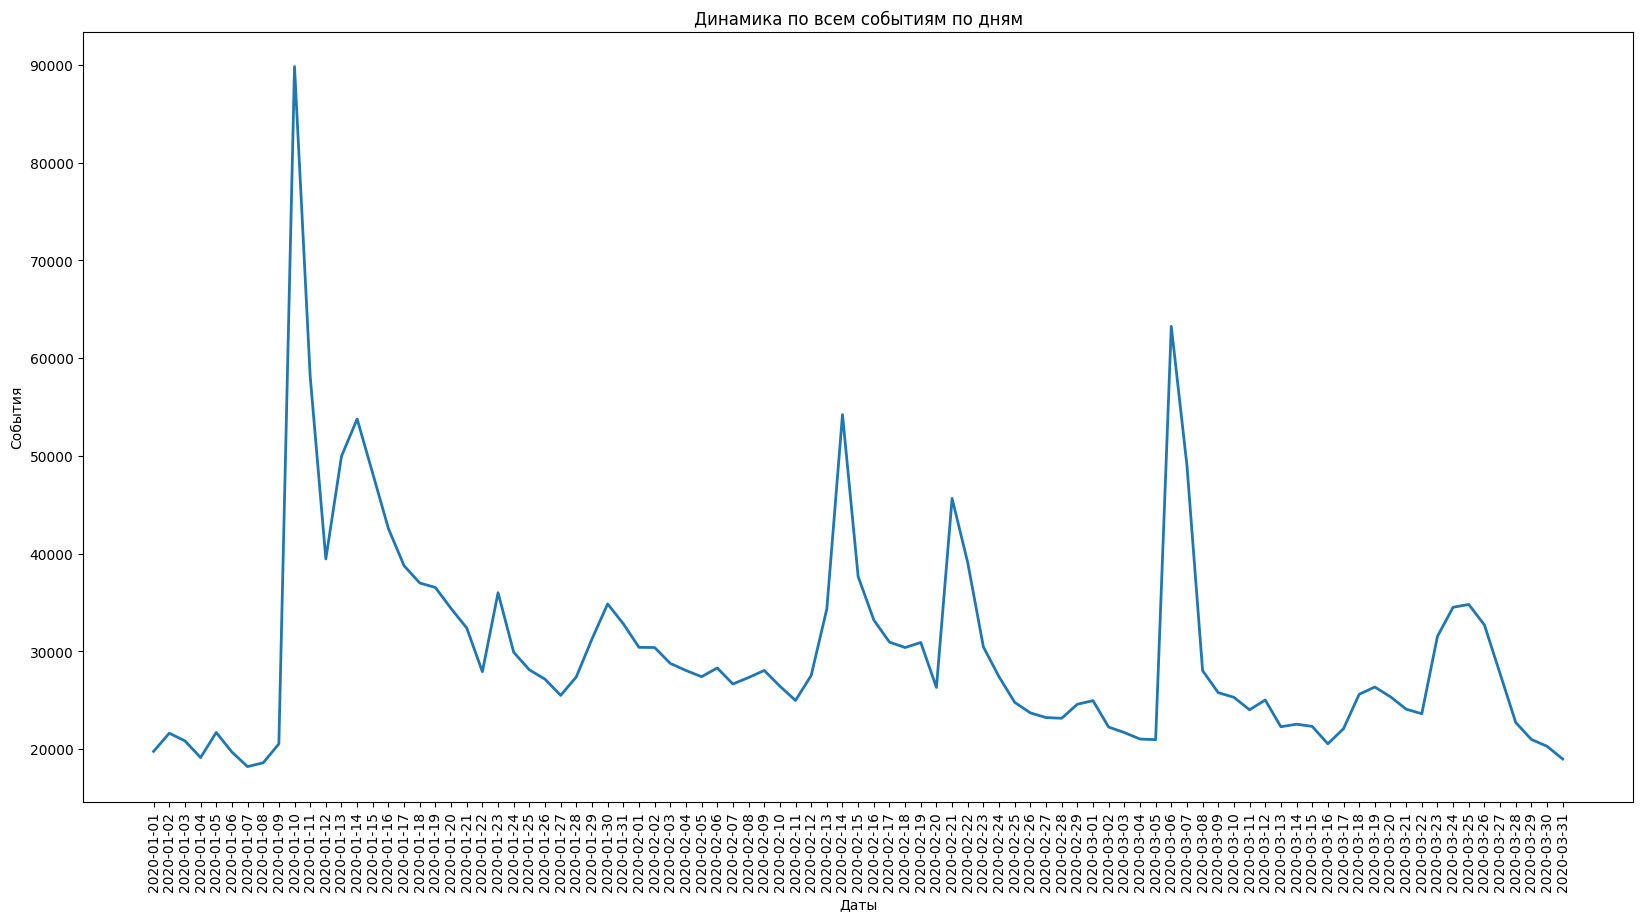

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('SF_case_data.csv')
# считаем количество событий по датам
data1 = data.groupby('date')['event'].count().reset_index()
print(data1.sort_values(by='event', ascending=False))

data_events = data.groupby('date')['event'].count()
# Строим график 'Динамика по всем событиям по дням'
plt.figure(figsize = (20,10))

plt.plot(data_events, linewidth=2.0)
plt.title('Динамика по всем событиям по дням')
plt.xlabel('Даты', color='black')
plt.ylabel('События',color='black')
plt.xticks(rotation=90)
plt.show()



,date,install_group,users
0,2020-01-01,Остальные,866
1,2020-01-01,Установили в этот же день,3579
2,2020-01-02,Остальные,1957
3,2020-01-02,Установили в этот же день,3144
4,2020-01-03,Остальные,2742
...,...,...,...
177,2020-03-29,Установили в этот же день,1117
178,2020-03-30,Остальные,4710
179,2020-03-30,Установили в этот же день,994
180,2020-03-31,Остальные,4322


,date,same_day,total,other,percent
0,2020-01-01,3579,4445,866,19.0
1,2020-01-02,3144,5101,1957,38.0
2,2020-01-03,2402,5144,2742,53.0
3,2020-01-04,1831,4924,3093,63.0
4,2020-01-05,1671,5607,3936,70.0
5,2020-01-06,1488,5165,3677,71.0
6,2020-01-07,1298,4773,3475,73.0
7,2020-01-08,1154,4950,3796,77.0
8,2020-01-09,1424,5416,3992,74.0
9,2020-01-10,13106,21429,8323,39.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2020-01-01  - День с максимальной долей трафика от инсталлов


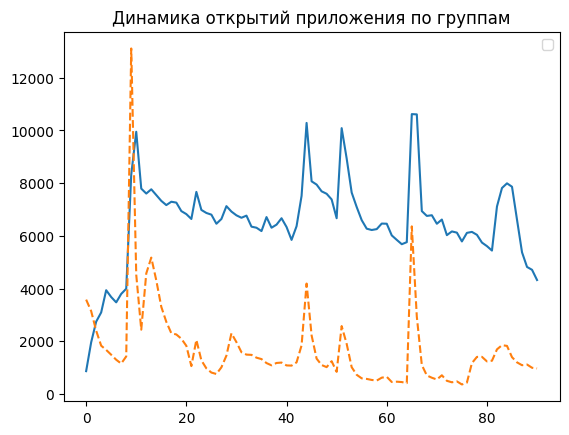

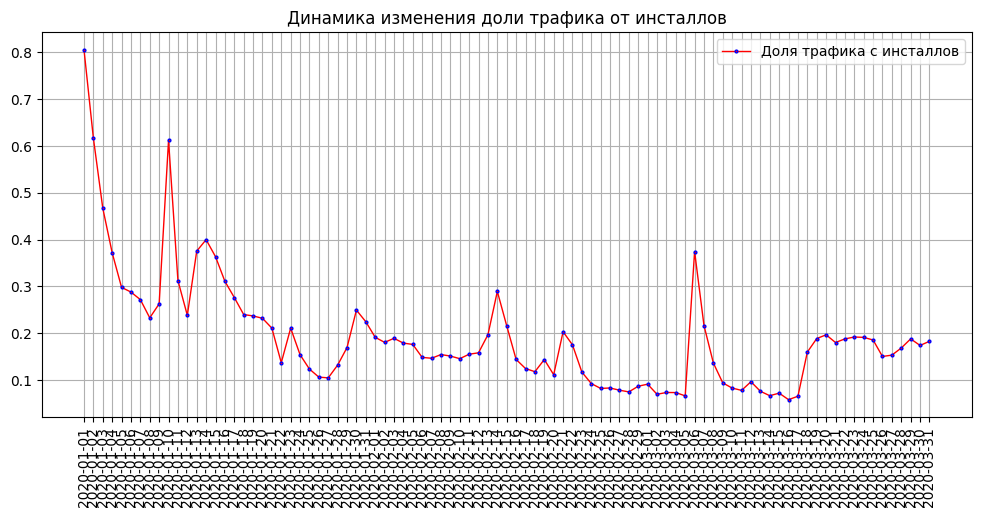

In [2]:
# Задание 1.1.2
# Посмотрите на то, как распределен трафик. Постройте график с динамикой открытий приложений 
# для групп «Установили в тот же день» и «Остальные».

import pandas as pd
import matplotlib.pyplot as plt
import plotly

data = pd.read_csv('SF_case_data.csv')
data1 = data.groupby('date')['event'].count().reset_index()
#print(data1.sort_values(by='event', ascending=False))    

# Задание 1.1.2 Вопрос 1 Сколько людей установили приложение 31 марта?

# находим события по установке приложения
installs = data[data['event'] == 'app_install'] 
# находим дату, когда были установлены приложения
data['install_date'] = data['device_id'].map(installs.set_index('device_id')['date'])

# пишем функцию, которая покажет, какие пользователи «Установили в тот же день» 
# и применяем ее к нашему датафрейму:
def new_column(date1,date2,value):
    if date1 == date2:
        return value

data['install_group'] = data.apply(lambda x: new_column(date1 = x['date'], date2 = x['install_date'], value = 'Установили в этот же день'), axis=1)

# заполняем пропуски в колонке ‘install_group’ и заменяем их на ‘Остальные’
data['install_group'] = data['install_group'].fillna('Остальные')

# создаем новый датафрейм, чтобы отобразить динамику по дням:
df = data[data['event'] == 'app_start'].groupby(['date','install_group']).size().reset_index(name = 'users')
#============================================
display(df)


#===============================================  
# Задание 1.1.2 Вопрос 2 Какая доля открытий приложения 14 февраля пришлась на пользователей, 
# у которых приложение уже было установлено (ответ впишите целым числом, в процентном виде,
# без знака процента).

# сначала нам нужно воспользоваться нашим датафреймом data и выделить оттуда пользователей,
# которые открыли приложение
traffic=data[data['event']=='app_start']

# создаем два новых датафрейма, где считаем количество инсталлов/установок (app_install) 
# и количество открытий по дням
same_day= installs.groupby(['date'])['device_id'].count().reset_index()
total= traffic.groupby(['date'])['device_id'].count().reset_index()

# соединяем оба датафрейма в один и переименовываем столбцы
app_open_perc=same_day.merge(total,how='left',on='date')
app_open_perc.rename(columns={'device_id_x':'same_day', 'device_id_y': 'total'},inplace=True)

# вычитаем из общего количества количество тех, кто установил в тот же день
app_open_perc['other']=app_open_perc['total']-app_open_perc['same_day']

# находим долю открытий приложений
app_open_perc['percent']=round(app_open_perc['other']/app_open_perc['total']*100)
#======================================
display(app_open_perc.head(45)) 

# Строим график 'Динамика открытий приложения по группам'

y1 = app_open_perc['other']
y2 = app_open_perc['same_day']
plt.legend()
plt.title('Динамика открытий приложения по группам')
plt.plot( y1, '-', y2, '--')


# Задание 1.1.3 В какой день доля трафика от инсталлов была наибольшей? 
# Ответ впишите в формате: ДД.ММ.ГГГГ.

# нужно воспользоваться уже существующим датафреймом df и создать из него
# два отдельных датафрейма
gr1 = df[df['install_group'] == 'Остальные']
gr2 = df[df['install_group'] != 'Остальные']

# объединяем новые датафреймы по дате
stat = gr1.merge(gr2, how = 'left', on = 'date')

# считаем долю трафика от инсталлов/установок по дням и находим, в какой день она наибольшая
stat['Доля трафика с инсталлов, %'] = stat['users_y']/(stat['users_y'] +stat['users_x'])
stat['gr'] = 'Трафик с инсталлов'
stat.sort_values('Доля трафика с инсталлов, %', ascending = True).head(3)


stat_target_date = stat.sort_values('Доля трафика с инсталлов, %', ascending=False).iloc[0]['date']
x = stat['date']
y1 = stat['Доля трафика с инсталлов, %']
plt.figure(figsize=(12, 5))
plt.plot(x, y1, 'o-r', alpha=1, label="Доля трафика с инсталлов", lw=1, mec='b', mew=1, ms=2)
plt.legend()
plt.title('Динамика изменения доли трафика от инсталлов')
plt.grid(True)
plt.xticks(rotation=90)
print(stat_target_date, ' - День с максимальной долей трафика от инсталлов')
#===============================




День с максимальной долей трафика от инсталлов — 1 января, хотя в абсолютном выражении количество инсталов в этот день не максимальное (3579 установок).
День с минимальной долей трафика от инсталлов — 16 марта (360 установок).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import numpy as np

data = pd.read_csv('SF_case_data.csv')

# Задание 1.1.4. С какого канала в Q1 пришло больше всего пользователей? 
# Впишите в поля ниже один ответ из возможных вариантов: Яндекс, Гугл, ВК, Фейсбук, Инстаграм,
# Реферальная программа.

# Вопрос 1. С какого канала было больше всего инсталлов?
# Итак, в этом задании нам нужно посчитать количество пользователей, установивших приложение
# по датам и каналам. Для этого мы выбираем пользователей, которые установили приложение
# и их группируем:

df_install = data[data['event'] == 'app_install'].groupby(['date','utm_source']).size().reset_index(name = 'users')
# После этого мы создаем pivot табличку, где считаем суммарное количество пользователей 
# пришедших с разных каналов по дням:
df_install = pd.pivot_table(df_install, values='users', index='utm_source', aggfunc='sum').sort_values('users',ascending = False)
display(df_install.head(7))

# Вопрос 2. С какого канала было больше всего первых открытий приложения?
# Здесь мы проделываем то же самое. Сначала выбираем пользователей, которые открыли приложение
# и группируем по дате и каналу, с которого эти пользователи пришли:
df_app_start = data[data['event'] == 'app_start'].drop_duplicates('device_id').groupby(['date','utm_source']).size().reset_index(name = 'users')
# После этого снова делаем pivot табличку:
df_app_start = pd.pivot_table(df_app_start, values='users', index='utm_source', aggfunc='sum').sort_values('users',ascending = False)

display(df_app_start.head(7))

#====================================================== 
# Строим график 'Динамика установок приложения по каналам привлечения'

df1 =data[data['event'] == 'app_install'].groupby(['date','utm_source']).size().reset_index(name = 'users')

# Группировка данных
grouped_data = df1.pivot(index='date', columns='utm_source', values='users')

# Построение интерактивного графика
fig = px.line(grouped_data, x=grouped_data.index, y=grouped_data.columns)

# Настройка осей и заголовка
fig.update_layout(
    xaxis_title='Дата',
    yaxis_title='Количество пользователей',
    title='Динамика установок приложения по каналам привлечения'
)

# Отображение легенды
fig.update_traces(showlegend=True)
# Отображение графика
fig.show()

#=============================
# Строим график 'Динамика первых открытий приложения по каналам привлечения'
df2 = data[data['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby(['date','utm_source']).size().reset_index(name = 'users')

# Группировка данных
grouped_data1 = df2.pivot(index='date', columns='utm_source', values='users')

# Построение интерактивного графика
fig = px.line(grouped_data1, x=grouped_data.index, y=grouped_data.columns)

# Настройка осей и заголовка
fig.update_layout(
    xaxis_title='Дата',
    yaxis_title='Количество пользователей',
    title='Динамика первых открытий приложения по каналам привлечения'
)

# Отображение легенды
fig.update_traces(showlegend=True)
# Отображение графика
fig.show()


df1['channel'] = 'channel'
pd.crosstab(df1.utm_source, df1.channel, values=df1.users, aggfunc=np.sum, normalize='columns').sort_values('channel', ascending = False)


,users
utm_source,
-,32460
yandex-direct,29368
google_ads,26286
vk_ads,23189
instagram_ads,20096
facebook_ads,13916
referal,9282


,users
utm_source,
-,41456
yandex-direct,34441
google_ads,31437
vk_ads,27905
instagram_ads,24818
facebook_ads,18844
referal,11983


channel,channel
utm_source,
-,0.209965
yandex-direct,0.189965
google_ads,0.170029
vk_ads,0.149996
instagram_ads,0.129990
facebook_ads,0.090015
referal,0.060040


Яндекс.Директ принес нам больше всего новых пользователей — 29368 установок приложения в Q1(19%). На 2-м месте — Гугл 26286 (17%)установок приложения. На 3-м месте ВК 23189 (15%) установок приложения. На последнем месте Реферальная программа 9282 (6%)установок приложения.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('SF_case_data.csv')
# Задание 1.1.5
# Проанализируйте, на каком этапе воронки отваливается б'ольшая часть клиентов. 
# Посмотрите отдельно сценарии для зарегистрированных и для незарегистрированных пользователей.
# Подумайте, можно ли что-то оптимизировать. Впишите в поля ниже один из шагов, конверсия 
# в который (из предыдущего шага) самая низкая. Возможные варианты ответа: Поиск, 
# Добавление товара, Переход в корзину, Регистрация, Покупка.

# Вопрос 1. На каком шаге отваливается больше всего зарегистрированных пользователей?

# Находим пользователей, которые зарегистрированы и добавляем новый столбец с 1, 
# что означает, что они зарегистрированы.
first_registration = data[data['event'] == 'register'].sort_values('date').drop_duplicates('device_id')
first_registration['finally_registered'] = 1
# Добавляем столбец с датой регистрации в табличку data и добавляем 
# еще один столбец 'finally_registered' с значением 1, который обозначает, 
# что регистрация была. Для этого используем функцию map.
data['first_registration'] = data['device_id'].map(first_registration.set_index('device_id')['date'])
data['finally_registered'] = data['device_id'].map(first_registration.set_index('device_id')['finally_registered'])
# После этого мы сравниваем дату 'first_registration' с 'date', и обозначаем
# зарегистрированных пользователей -1, а незарегистрированных 0.
already_reg = data[data['first_registration'] < data['date']]
already_reg['registered'] = 1
requires_reg1 = data[(data['first_registration'].isna() == True)]
requires_reg1['registered'] = 0
requires_reg2 =  data[data['first_registration'] >= data['date']]
requires_reg2['registered'] = 0
# Далее мы объединяем полученные в табличку data и выбираем тех, кто дошли до покупки.
data = pd.concat([already_reg,requires_reg1,requires_reg2])
# После этого подсчитываем зарегистрированных и незарегистрированных пользователей на всех этапах.
display(data[data['event'] == 'tap_basket'].groupby('registered').count())

# Теперь, чтобы подготовить финальную табличку с количеством пользователей на разных
# этапах для расчета конверсии зарегистрированных пользователей, создаем новую табличку, 
# выбираем только зарегистрированных и с помощью функции crosstab делаем объединение таблиц. 
reg = data[data['registered'] == 1]
funnel_reg = pd.crosstab(reg.utm_source, reg.event, values=reg.device_id, aggfunc=pd.Series.nunique)
#    Теперь рассчитываем конверсию на каждом этапе для зарегестрированных пользователей
funnel_reg['1 step'] = funnel_reg['search']*100/funnel_reg['app_start']
funnel_reg['2 step'] = funnel_reg['choose_item']*100/funnel_reg['search']
funnel_reg['3 step'] = funnel_reg['tap_basket']*100/funnel_reg['choose_item']
funnel_reg['5 step'] = funnel_reg['purchase']*100/funnel_reg['tap_basket']
display(funnel_reg)

#Вопрос 2. На каком шаге отваливается больше всего незарегистрированных пользователей?

# После этого проделываем то же самое, но с незарегистрированными пользователями.  
# выбираем только незарегистрированных и с помощью функции crosstab делаем объединение таблиц. 
not_reg = data[data['registered'] == 0]
funnel_not_reg = pd.crosstab(not_reg.utm_source, not_reg.event, values=not_reg.device_id, aggfunc=pd.Series.nunique)
#    Теперь рассчитываем конверсию на каждом этапе для зарегестрированных пользователей
funnel_not_reg['1 step'] = funnel_not_reg['search']*100/funnel_not_reg['app_start']
funnel_not_reg['2 step'] = funnel_not_reg['choose_item']*100/funnel_not_reg['search']
funnel_not_reg['3 step'] = funnel_not_reg['tap_basket']*100/funnel_not_reg['choose_item']
funnel_not_reg['4 step'] = funnel_not_reg['register']*100/funnel_not_reg['tap_basket']
funnel_not_reg['5 step'] = funnel_not_reg['purchase']*100/funnel_not_reg['register']
funnel_not_reg
display(funnel_not_reg)



c:\temp1\ipykernel_1752\1732925191.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  already_reg['registered'] = 1
c:\temp1\ipykernel_1752\1732925191.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requires_reg1['registered'] = 0
c:\temp1\ipykernel_1752\1732925191.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,first_registration,finally_registered
registered,,,,,,,,,,
0,160409,160409,0,160409,160409,160409,160409,160409,105031,105031
1,217256,217256,0,217256,217256,217256,217256,217256,217256,217256


event,app_start,choose_item,purchase,search,tap_basket,1 step,2 step,3 step,5 step
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.660620,93.297702,89.940422,69.961783
facebook_ads,5606,5154,3333,5527,4694,98.590796,93.251312,91.074893,71.005539
google_ads,5399,4948,3121,5335,4438,98.814595,92.746017,89.692805,70.324470
instagram_ads,5686,5288,3548,5618,4842,98.804080,94.126023,91.565809,73.275506
referal,3647,3417,2382,3610,3155,98.985468,94.653740,92.332455,75.499208
vk_ads,6011,5636,3950,5958,5196,99.118283,94.595502,92.193045,76.020015
yandex-direct,5396,4928,3099,5304,4464,98.295033,92.911011,90.584416,69.422043


event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 step,2 step,3 step,4 step,5 step
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.038627,81.352959,76.850050,56.554769,85.151570
facebook_ads,13916,23780,18713,7506,8672,22822,14592,95.971405,81.995443,77.977876,59.429825,86.554428
google_ads,26286,35778,27416,9777,11405,34217,20765,95.636984,80.123915,75.740444,54.924151,85.725559
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.827205,81.586180,78.226442,60.119680,87.386047
referal,9282,14866,11880,5503,6193,14316,9518,96.300283,82.984074,80.117845,65.066190,88.858389
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.848917,81.980006,78.727087,62.061557,87.907576
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.735912,80.120759,75.756142,55.056430,85.731648


Больше всего незарегистрированных пользователей отваливается на шаге регистрации (доходит только половина). Скорее всего, стоит подумать над тем, как можно упростить этот шаг. Залогиненные пользователи отваливаются на последнем шаге - покупке, но тем не менее, до покупки доходит 70 % из тех, что перешли в корзину.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('SF_case_data.csv')

# Задание 1.1.6
# Впишите в поля ниже один ответ из возможных вариантов: Яндекс, Гугл, ВК, Фейсбук, Инстаграм,
# Реферальная программа.

# Вопрос 1. Пользователи, пришедшие с каких каналов, показали (за весь Q1) самую высокую
# конверсию в первую покупку?
# Вопрос 2. Пользователи, пришедшие с каких каналов, показали (за весь Q1) самую низкую 
# конверсию в первую покупку?

first_opens = data[data['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
first_purchase = data[data['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')

stat = first_opens.merge(first_purchase, how = 'left', on = 'utm_source')
stat['CR to first purchase'] = stat['users_y']/stat['users_x']
display(stat)



,utm_source,users_x,users_y,CR to first purchase
0,-,41456,14786,0.356667
1,facebook_ads,18844,7903,0.419391
2,google_ads,31437,10167,0.323409
3,instagram_ads,24818,9820,0.395681
4,referal,11983,5803,0.484269
5,vk_ads,27905,11460,0.410679
6,yandex-direct,34441,10936,0.317529


Если смотреть на данные за весь квартал агрегировано, то мы видим, что довольно большая часть пользователей всё-таки совершает свою первую покупку (не в день первого захода, а даже спустя какое-то время). Самый большой CR — у реферальной программы (48,4%), а самый маленький — у Яндекс.Директа.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('SF_case_data.csv')

# Задание 1.1.7
# Впишите в поле ниже один ответ из возможных вариантов: Яндекс, Гугл, ВК, Фейсбук, Инстаграм,
# Реферальная программа.

# Вопрос. Пользователи, пришедшие с какого канала, имеют медианный первый чек выше? 
# (Учитываются только первые покупки пользователей.)
data[data['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source'])['purchase_sum'].agg(['mean','median']).sort_values('mean', ascending = False)



,mean,median
utm_source,,
yandex-direct,725.740719,392.5
vk_ads,716.480192,393.0
instagram_ads,716.201018,393.5
google_ads,700.920134,390.5
-,698.211078,398.5
referal,696.420128,395.5
facebook_ads,692.090029,389.0


Пользователи, пришедшие с Реферального канала, имеют медианный первый чек 395.5 рублей, это выше чем у других. (Учитываются только первые покупки пользователей.)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('SF_case_data.csv')

# Задание 1.1.8 
# Расходы на реферальную программу: если пользователь приведет друга и последний совершит
# первую покупку, то оба получат по 100 рублей.

# Впишите в поля ниже один ответ из возможных вариантов: Яндекс, Гугл, ВК, Фейсбук, Инстаграм.

# Вопрос 1. Какой платный канал привлечения имеет самый высокий ROMI?
# Вопрос 2. Какой платный канал привлечения имеет самый низкий ROMI?

display(data[data['event'] == 'purchase'].groupby(['utm_source'])['purchase_sum'].sum())


print('Яндекс: {} %'.format((13915368/10491707-1)*100))
print('Гугл: {} %'.format((12868276/10534878-1)*100))
print('Фейсбук: {} %'.format((12249901/8590498-1)*100))
print('Инстаграм: {} %'.format((14546969/8561626 -1)*100))
print('ВК: {} %'.format((16389652.5/9553531-1)*100))

data[data['event']=='purchase'].drop_duplicates('device_id')['utm_source'].value_counts()


utm_source
-                21449749.5
facebook_ads     12249901.0
google_ads       12868276.0
instagram_ads    14546969.0
referal           8837044.5
vk_ads           16389652.5
yandex-direct    13915368.0
Name: purchase_sum, dtype: float64

Яндекс: 32.63206835646477 %
Гугл: 22.149264566708805 %
Фейсбук: 42.59826380263403 %
Инстаграм: 69.90895187432855 %
ВК: 71.55596710786828 %


-                14786
vk_ads           11460
yandex-direct    10936
google_ads       10167
instagram_ads     9820
facebook_ads      7903
referal           5803
Name: utm_source, dtype: int64

Самый высокий ROMI — у ВК (71.56 %). Скорее всего, это было достигнуто за счёт лояльности аудитории, пришедшей оттуда, а также их высокого LTV. Однако самая выгодная опция — реферальная программа, в рамках которой за 3 месяца 5803(ЕСТЬ ПОДОЗРЕНИЕ ЧТО ЗДЕСЬ ОШИБКА В КОДЕ И ДОЛЖНО БЫТЬ 5874) пользователей принесло 8837044.5 рублей.

## 2. Пользовательская аналитика

#### Задачи: Проведите когортный анализ по:

* неделе первого посещения;
* неделе регистрации;
* неделе первой покупки.

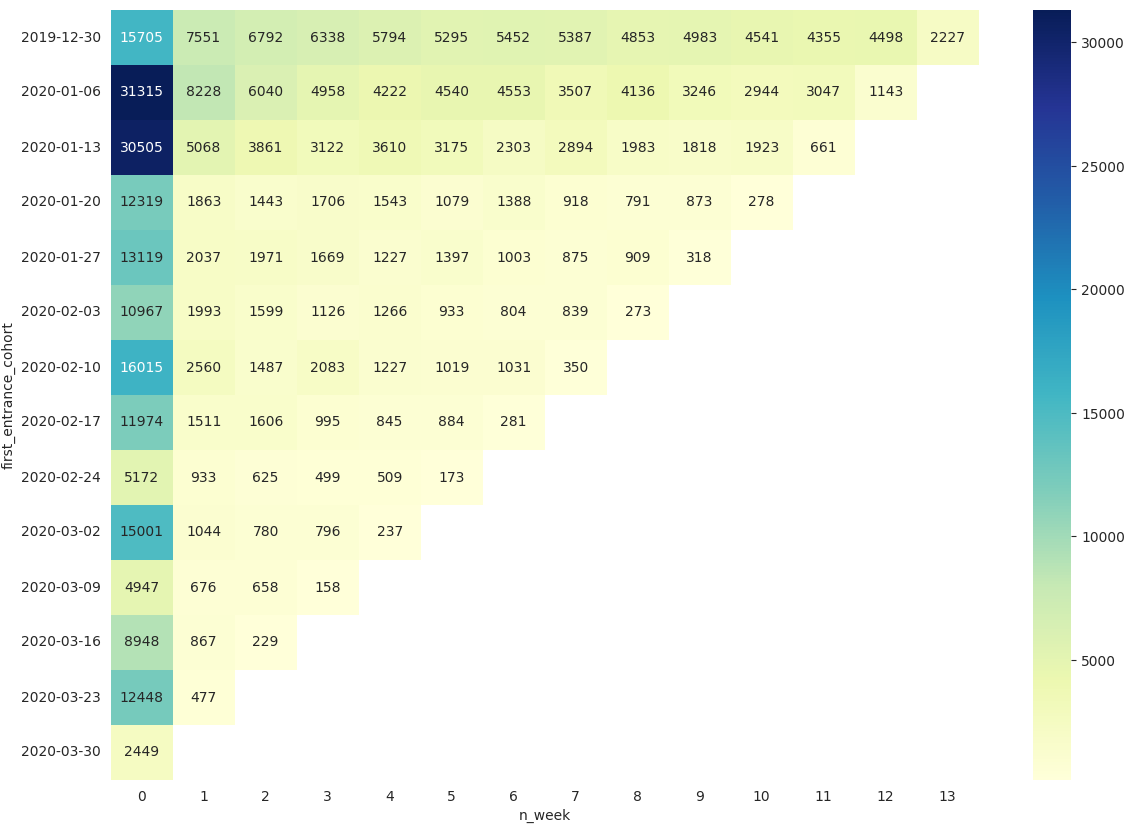

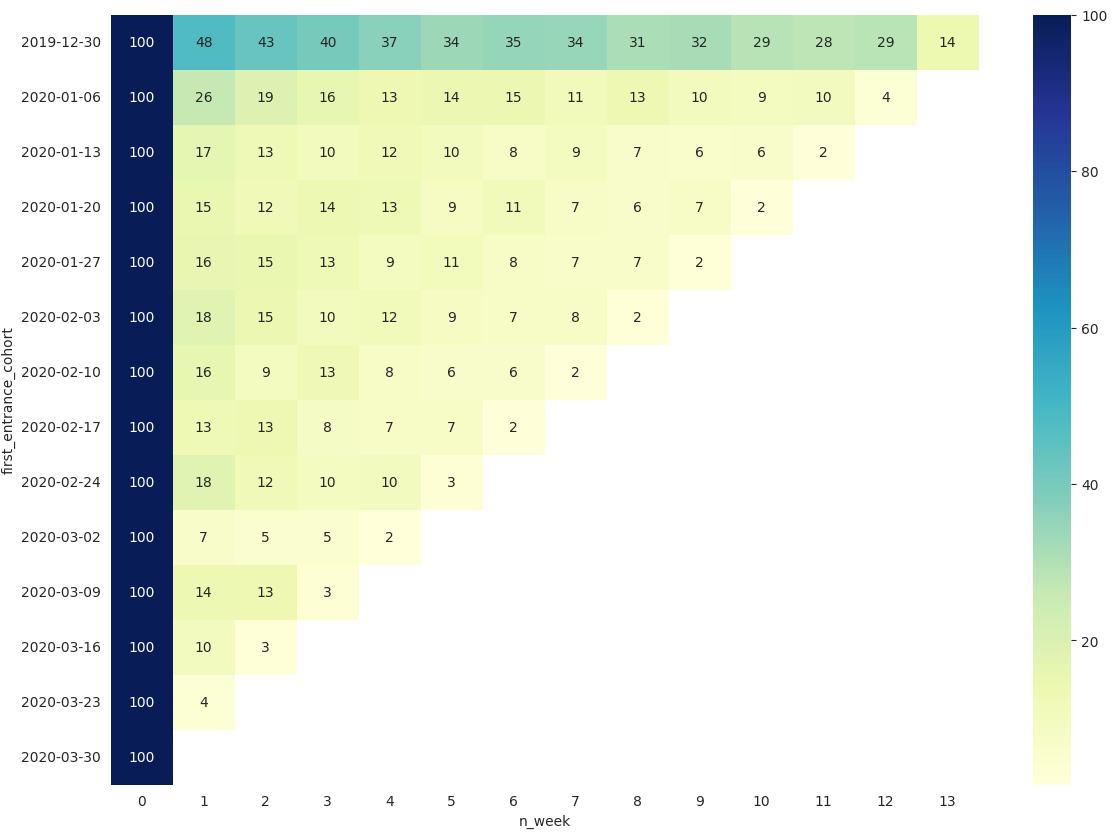

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

data = pd.read_csv('SF_case_data.csv')

# Задание 1.2.1
# Какая когорта самая активная? Ответ впишите в формате: ДД.ММ.ГГГГ.
# Дата здесь — это дата начала недели когорты.

entrances = data[data['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id')
data['first_entrance'] = data['device_id'].map(entrances.set_index('device_id')['date'])
data['first_entrance'] = pd.to_datetime(data['first_entrance'], format = '%Y-%m-%d')
data['first_entrance_cohort'] = data['first_entrance'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data['n_week'] = data['date'] - data['first_entrance_cohort']
data['n_week'] = data['n_week'].apply(lambda x: x.days // 7 )
data['first_entrance_cohort'] = data['first_entrance_cohort'].apply(lambda x: str(x)[:10])
viz = data.pivot_table(
                        index='first_entrance_cohort', 
                        columns='n_week', 
                        values='device_id', 
                        aggfunc=pd.Series.nunique)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu")
    
viz = viz.apply(lambda x: x*100/viz[0])
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu")

Самая активная когорта — когорта, пришедшая на первой неделе Q1 30.12.2019 г.. Активность этой когорты в несколько раз выше, чем у остальных. Эта же когорта приносит больше всего денег. Стоит стремиться к тому, чтобы все остальные когорты были похожи на неё.

c:\temp1\ipykernel_24936\1367879008.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\temp1\ipykernel_24936\1367879008.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\temp1\ipykernel_24936\1367879008.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c

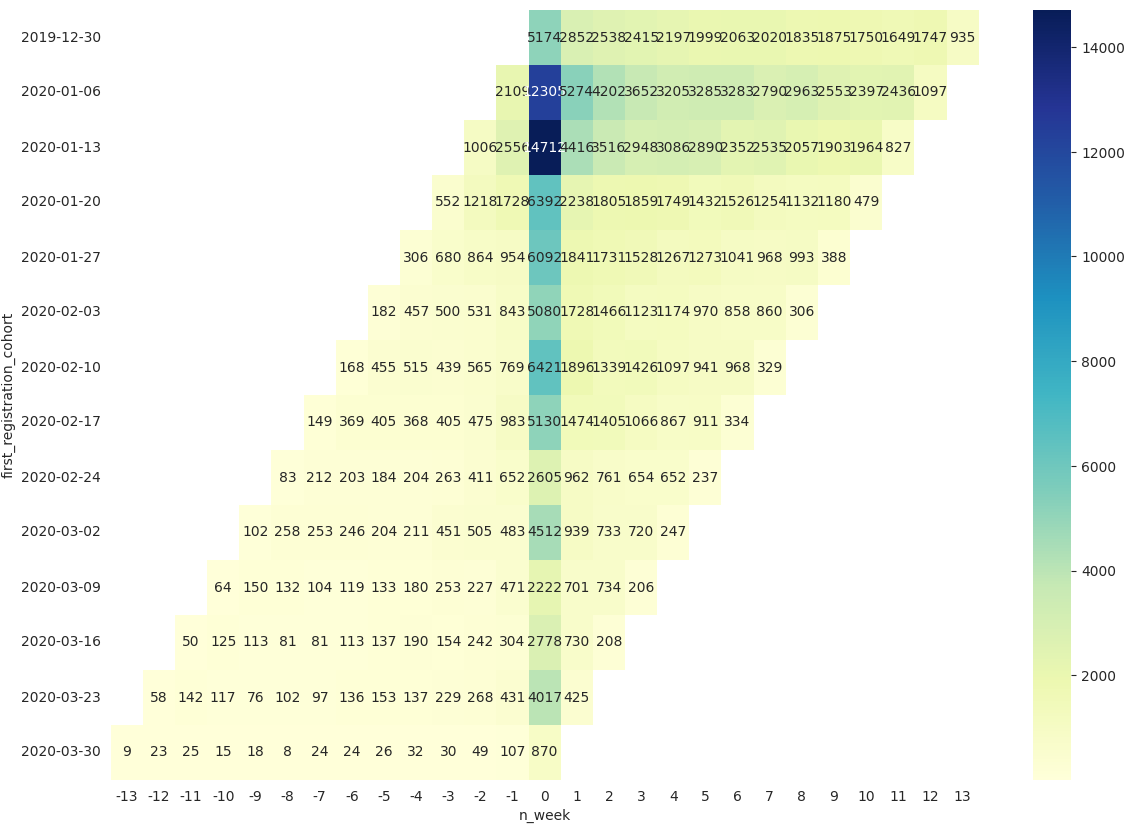

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
data = pd.read_csv('SF_case_data.csv')

# Задание 1.2.2
# Регистрируются ли все пользователи в день первого посещения?
first_registration = data[data['event'] == 'register'].sort_values('date').drop_duplicates('device_id')
data['first_registration'] = data['device_id'].map(first_registration.set_index('device_id')['date'])


df = data[-data['first_registration'].isna()]
df['first_registration'] = pd.to_datetime(df['first_registration'], format = '%Y-%m-%d')
df['first_registration_cohort'] = df['first_registration'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['n_week'] = df['date'] - df['first_registration_cohort']
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )
df['first_registration_cohort'] = df['first_registration_cohort'].apply(lambda x: str(x)[:10])
viz = df.pivot_table(
                        index='first_registration_cohort', 
                        columns='n_week', 
                        values='device_id', 
                        aggfunc=pd.Series.nunique)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu")



Нетрадиционная форма heat map показывает нам, что многие пользователи несколько недель подряд заходят в приложение, прежде чем зарегистрироваться.

c:\temp1\ipykernel_11564\1560275010.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_purchase_cohort'] = df['first_purchase'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
c:\temp1\ipykernel_11564\1560275010.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
c:\temp1\ipykernel_11564\1560275010.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,first_purchase_cohort,LTV
1,2020-01-06,19787838.0
2,2020-01-13,18852452.0
0,2019-12-30,12320177.5
3,2020-01-20,9018049.5
4,2020-01-27,7432634.0
6,2020-02-10,6766314.0
5,2020-02-03,6305237.0
7,2020-02-17,5398837.5
9,2020-03-02,3629773.0
8,2020-02-24,3067633.5


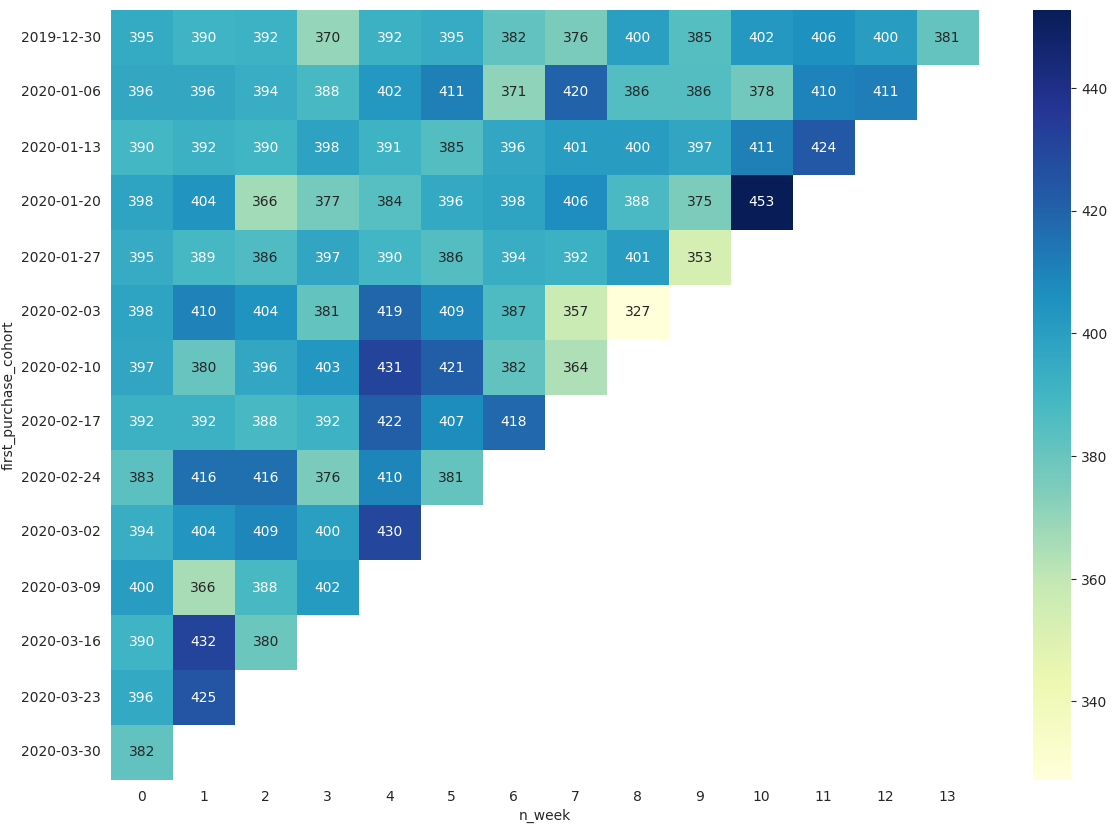

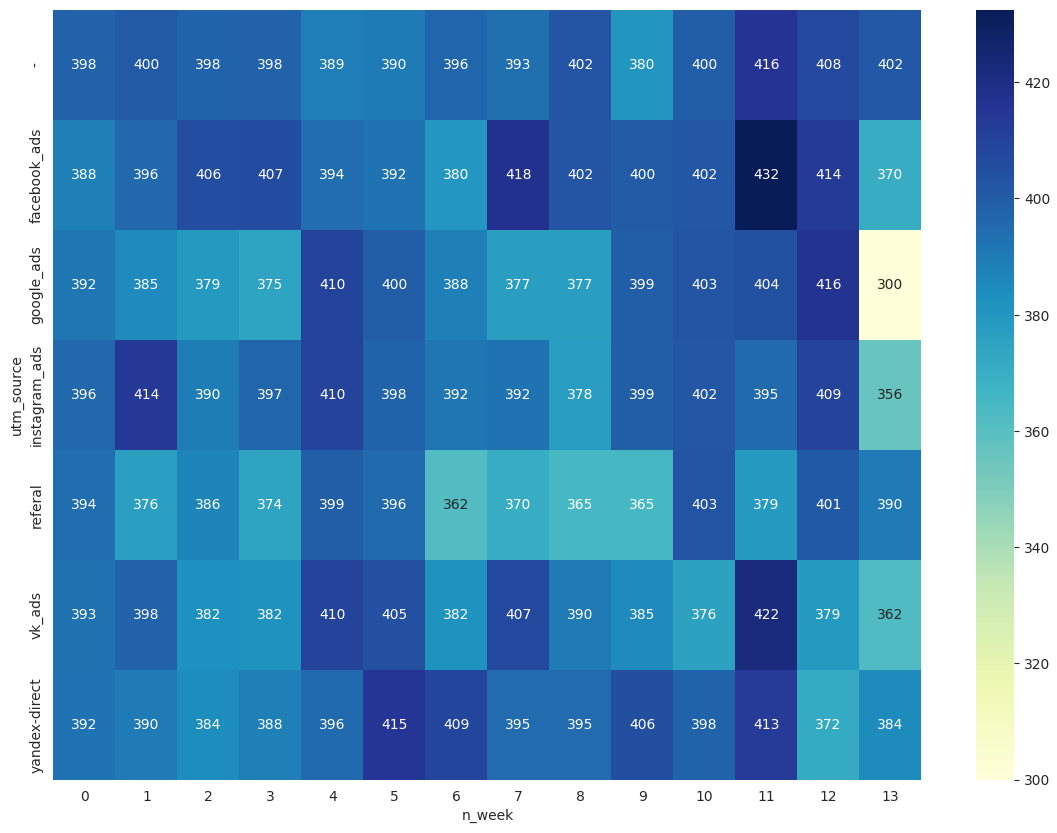

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

data = pd.read_csv('SF_case_data.csv')

#Задание 1.2.3

#Какая когорта принесла больше всего денег? Ответ впишите в формате: ДД.ММ.ГГГГ.
# Дата здесь — это дата начала недели когорты.
purchases = data[data['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id')
data['first_purchase'] = data['device_id'].map(purchases.set_index('device_id')['date'])
data['first_purchase'] = pd.to_datetime(data['first_purchase'], format = '%Y-%m-%d')
df = data[-data['first_purchase'].isna()]
df['first_purchase_cohort'] = df['first_purchase'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['n_week'] = df['date'] - df['first_purchase_cohort']
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )
df['first_purchase_cohort'] = df['first_purchase_cohort'].apply(lambda x: str(x)[:10])

df = df[df['event'] == 'purchase']
display(df.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False))


# Задание 1.2.4
# У какой когорты выше медианный чек на неделе первой покупки? Ответ впишите 
# в формате: ДД.ММ.ГГГГ. Дата здесь — это дата начала недели когорты.

viz = df.pivot_table(
                        index='first_purchase_cohort', 
                        columns='n_week', 
                        values='purchase_sum', 
                        aggfunc=np.median)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu")


# Задание 1.2.5
# Сравните медианный чек на второй неделе с момента первой покупки для всех 
# каналов привлечения. У какого канала он выше?

viz = df.pivot_table(
                        index='utm_source', 
                        columns='n_week', 
                        values='purchase_sum', 
                        aggfunc=np.median)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu")

    


Когорта от 06.01.2020 принесла больше всего денег 19787838 рублей.

Медианный чек на неделе первой покупки выше у когорты от 9 марта 2020 г.(=400 рублей).

Медианный чек на второй неделе с момента первой покупки на канале привлечения Инстаграм 414 рублей выше, чем у остальных.